<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/bilstm_attention_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Attention, GlobalMaxPooling1D, Concatenate, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 5

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 54s 117ms/step - loss: 0.6785 - accuracy: 0.5476 - val_loss: 0.4526 - val_accuracy: 0.8148
Epoch 2/100
176/176 [==============================] - 20s 115ms/step - loss: 0.4073 - accuracy: 0.8361 - val_loss: 0.3159 - val_accuracy: 0.8708
Epoch 3/100
176/176 [==============================] - 20s 116ms/step - loss: 0.2545 - accuracy: 0.9019 - val_loss: 0.3223 - val_accuracy: 0.8696
Epoch 4/100
176/176 [==============================] - 21s 117ms/step - loss: 0.2111 - accuracy: 0.9195 - val_loss: 0.2905 - val_accuracy: 0.8788
Epoch 5/100
176/176 [==============================] - 20s 115ms/step - loss: 0.1769 - accuracy: 0.9385 - val_loss: 0.3132 - val_accuracy: 0.8828
Epoch 6/100
176/176 [==============================] - 20s 115ms/step - loss: 0.1550 - accuracy: 0.9460 - val_loss: 0.3040 - val_accuracy: 0.8784
Epoch 7/100
176/176 [==============================] - 20s 115ms/step - loss: 0.1383 - accuracy: 0.9527 - v

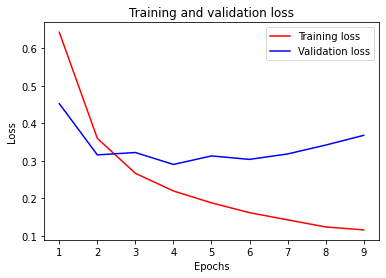

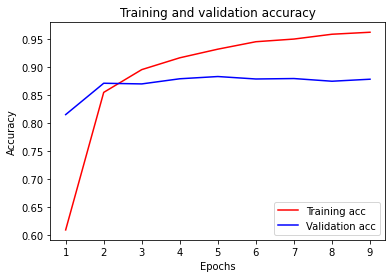

              precision    recall  f1-score   support

           0      0.866     0.886     0.876     12500
           1      0.883     0.863     0.873     12500

    accuracy                          0.874     25000
   macro avg      0.875     0.874     0.874     25000
weighted avg      0.875     0.874     0.874     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 23s 119ms/step - loss: 0.6652 - accuracy: 0.5721 - val_loss: 0.3440 - val_accuracy: 0.8540
Epoch 2/100
176/176 [==============================] - 20s 116ms/step - loss: 0.3049 - accuracy: 0.8785 - val_loss: 0.2955 - val_accuracy: 0.8776
Epoch 3/100
176/176 [==============================] - 20s 116ms/step - loss: 0.2310 - accuracy: 0.9114 - val_loss: 0.2771 - val_accuracy: 0.8848
Epoch 4/100
176/176 [==============================] - 20s 116ms/step - loss: 0.1965 - accuracy: 0.9288 - val_loss: 0.2886 - val_accuracy: 0.8820
Epoch 5/100
176/176 [==============================] - 20s 116ms/step -

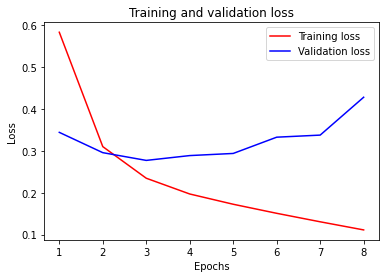

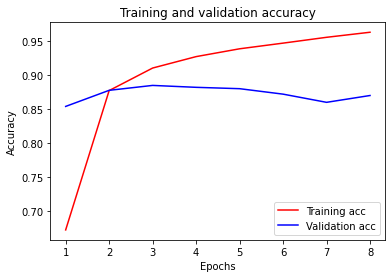

              precision    recall  f1-score   support

           0      0.878     0.890     0.884     12500
           1      0.888     0.876     0.882     12500

    accuracy                          0.883     25000
   macro avg      0.883     0.883     0.883     25000
weighted avg      0.883     0.883     0.883     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 24s 119ms/step - loss: 0.6601 - accuracy: 0.5647 - val_loss: 0.3084 - val_accuracy: 0.8748
Epoch 2/100
176/176 [==============================] - 20s 116ms/step - loss: 0.2892 - accuracy: 0.8844 - val_loss: 0.2912 - val_accuracy: 0.8836
Epoch 3/100
176/176 [==============================] - 20s 116ms/step - loss: 0.2264 - accuracy: 0.9142 - val_loss: 0.2779 - val_accuracy: 0.8836
Epoch 4/100
176/176 [==============================] - 20s 115ms/step - loss: 0.1897 - accuracy: 0.9332 - val_loss: 0.3053 - val_accuracy: 0.8856
Epoch 5/100
176/176 [==============================] - 20s 116ms/step -

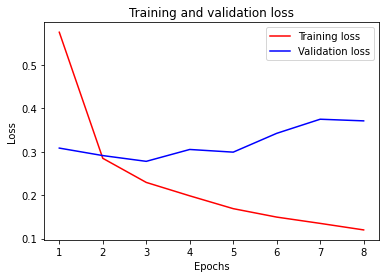

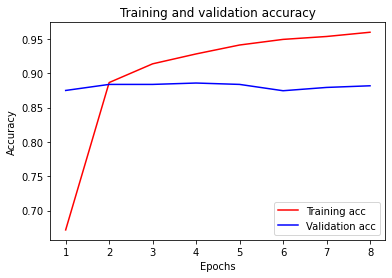

              precision    recall  f1-score   support

           0      0.861     0.909     0.884     12500
           1      0.903     0.854     0.878     12500

    accuracy                          0.881     25000
   macro avg      0.882     0.881     0.881     25000
weighted avg      0.882     0.881     0.881     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 24s 119ms/step - loss: 0.6849 - accuracy: 0.5508 - val_loss: 0.4358 - val_accuracy: 0.8200
Epoch 2/100
176/176 [==============================] - 20s 116ms/step - loss: 0.5348 - accuracy: 0.7492 - val_loss: 0.3001 - val_accuracy: 0.8760
Epoch 3/100
176/176 [==============================] - 20s 116ms/step - loss: 0.2787 - accuracy: 0.8898 - val_loss: 0.2835 - val_accuracy: 0.8804
Epoch 4/100
176/176 [==============================] - 20s 116ms/step - loss: 0.2217 - accuracy: 0.9154 - val_loss: 0.2876 - val_accuracy: 0.8808
Epoch 5/100
176/176 [==============================] - 20s 116ms/step -

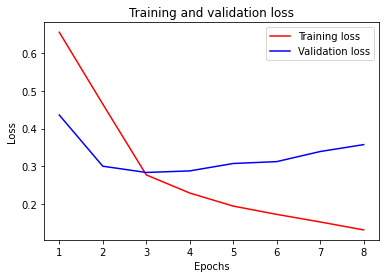

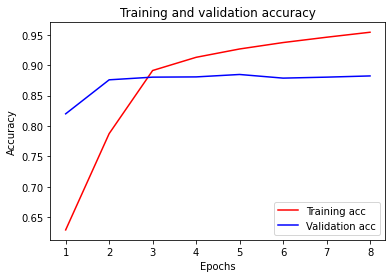

              precision    recall  f1-score   support

           0      0.851     0.909     0.879     12500
           1      0.903     0.841     0.871     12500

    accuracy                          0.875     25000
   macro avg      0.877     0.875     0.875     25000
weighted avg      0.877     0.875     0.875     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 24s 122ms/step - loss: 0.6730 - accuracy: 0.5506 - val_loss: 0.4988 - val_accuracy: 0.8140
Epoch 2/100
176/176 [==============================] - 21s 117ms/step - loss: 0.5082 - accuracy: 0.7769 - val_loss: 0.3398 - val_accuracy: 0.8540
Epoch 3/100
176/176 [==============================] - 21s 117ms/step - loss: 0.2869 - accuracy: 0.8885 - val_loss: 0.3245 - val_accuracy: 0.8624
Epoch 4/100
176/176 [==============================] - 20s 116ms/step - loss: 0.2310 - accuracy: 0.9158 - val_loss: 0.2942 - val_accuracy: 0.8804
Epoch 5/100
176/176 [==============================] - 20s 116ms/step -

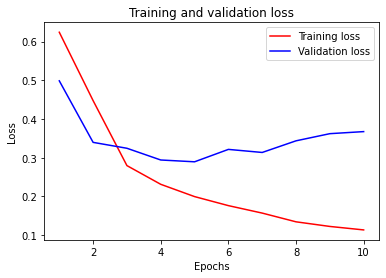

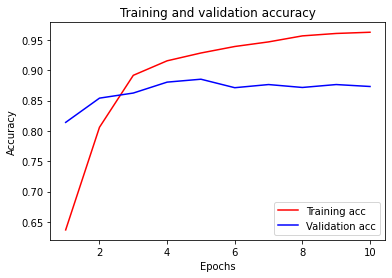

              precision    recall  f1-score   support

           0      0.896     0.862     0.879     12500
           1      0.867     0.900     0.883     12500

    accuracy                          0.881     25000
   macro avg      0.881     0.881     0.881     25000
weighted avg      0.881     0.881     0.881     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 24s 120ms/step - loss: 0.6823 - accuracy: 0.5431 - val_loss: 0.4174 - val_accuracy: 0.8252
Epoch 2/100
176/176 [==============================] - 21s 117ms/step - loss: 0.5041 - accuracy: 0.7689 - val_loss: 0.3385 - val_accuracy: 0.8540
Epoch 3/100
176/176 [==============================] - 21s 117ms/step - loss: 0.3714 - accuracy: 0.8431 - val_loss: 0.2885 - val_accuracy: 0.8784
Epoch 4/100
176/176 [==============================] - 21s 117ms/step - loss: 0.2468 - accuracy: 0.9069 - val_loss: 0.2866 - val_accuracy: 0.8788
Epoch 5/100
176/176 [==============================] - 20s 116ms/step -

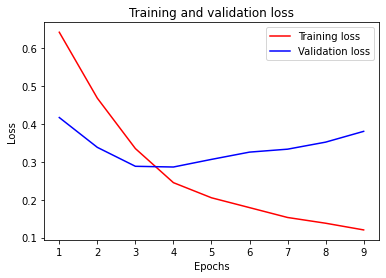

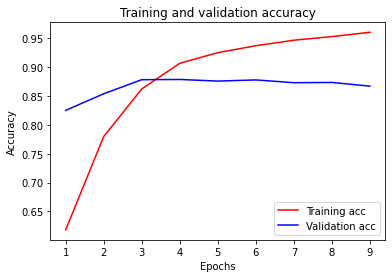

              precision    recall  f1-score   support

           0      0.874     0.891     0.882     12500
           1      0.888     0.871     0.880     12500

    accuracy                          0.881     25000
   macro avg      0.881     0.881     0.881     25000
weighted avg      0.881     0.881     0.881     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 24s 120ms/step - loss: 0.6700 - accuracy: 0.5707 - val_loss: 0.4542 - val_accuracy: 0.7720
Epoch 2/100
176/176 [==============================] - 21s 117ms/step - loss: 0.4155 - accuracy: 0.8216 - val_loss: 0.3170 - val_accuracy: 0.8744
Epoch 3/100
176/176 [==============================] - 20s 116ms/step - loss: 0.2806 - accuracy: 0.8882 - val_loss: 0.2987 - val_accuracy: 0.8820
Epoch 4/100
176/176 [==============================] - 20s 116ms/step - loss: 0.2340 - accuracy: 0.9131 - val_loss: 0.3426 - val_accuracy: 0.8584
Epoch 5/100
176/176 [==============================] - 20s 117ms/step -

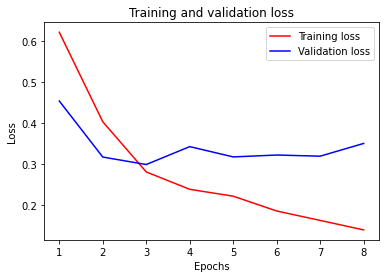

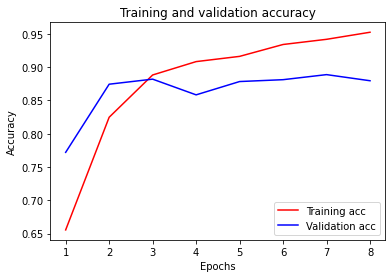

              precision    recall  f1-score   support

           0      0.858     0.900     0.879     12500
           1      0.895     0.851     0.872     12500

    accuracy                          0.876     25000
   macro avg      0.877     0.876     0.876     25000
weighted avg      0.877     0.876     0.876     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 24s 120ms/step - loss: 0.6788 - accuracy: 0.5423 - val_loss: 0.5586 - val_accuracy: 0.7300
Epoch 2/100
176/176 [==============================] - 21s 117ms/step - loss: 0.5112 - accuracy: 0.7821 - val_loss: 0.3423 - val_accuracy: 0.8560
Epoch 3/100
176/176 [==============================] - 21s 117ms/step - loss: 0.3106 - accuracy: 0.8831 - val_loss: 0.2862 - val_accuracy: 0.8824
Epoch 4/100
176/176 [==============================] - 21s 118ms/step - loss: 0.2424 - accuracy: 0.9104 - val_loss: 0.2692 - val_accuracy: 0.8956
Epoch 5/100
176/176 [==============================] - 21s 117ms/step -

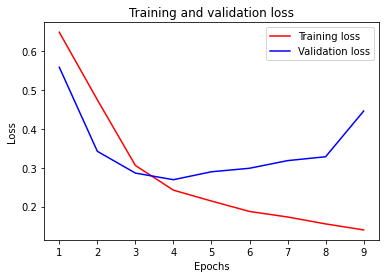

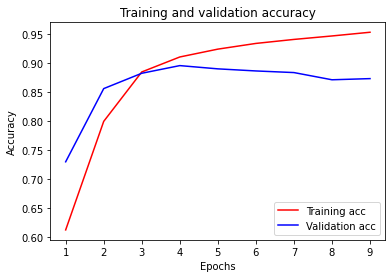

              precision    recall  f1-score   support

           0      0.895     0.863     0.878     12500
           1      0.868     0.898     0.883     12500

    accuracy                          0.881     25000
   macro avg      0.881     0.881     0.881     25000
weighted avg      0.881     0.881     0.881     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 24s 120ms/step - loss: 0.6606 - accuracy: 0.5705 - val_loss: 0.3441 - val_accuracy: 0.8516
Epoch 2/100
176/176 [==============================] - 21s 117ms/step - loss: 0.3029 - accuracy: 0.8829 - val_loss: 0.2786 - val_accuracy: 0.8868
Epoch 3/100
176/176 [==============================] - 21s 117ms/step - loss: 0.2253 - accuracy: 0.9151 - val_loss: 0.2595 - val_accuracy: 0.8924
Epoch 4/100
176/176 [==============================] - 21s 117ms/step - loss: 0.1933 - accuracy: 0.9298 - val_loss: 0.2574 - val_accuracy: 0.8976
Epoch 5/100
176/176 [==============================] - 21s 117ms/step -

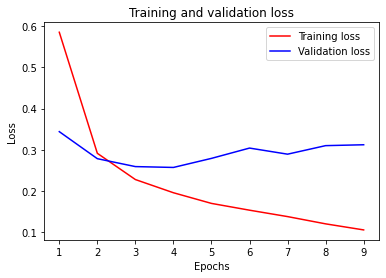

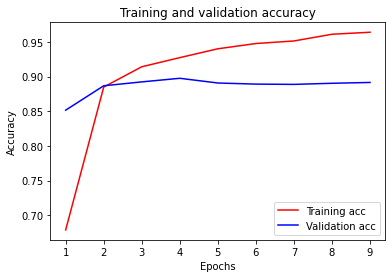

              precision    recall  f1-score   support

           0      0.888     0.873     0.880     12500
           1      0.875     0.890     0.882     12500

    accuracy                          0.881     25000
   macro avg      0.882     0.881     0.881     25000
weighted avg      0.882     0.881     0.881     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 24s 120ms/step - loss: 0.6819 - accuracy: 0.5494 - val_loss: 0.4481 - val_accuracy: 0.8060
Epoch 2/100
176/176 [==============================] - 21s 117ms/step - loss: 0.3713 - accuracy: 0.8475 - val_loss: 0.3018 - val_accuracy: 0.8796
Epoch 3/100
176/176 [==============================] - 21s 117ms/step - loss: 0.2480 - accuracy: 0.9049 - val_loss: 0.2975 - val_accuracy: 0.8796
Epoch 4/100
176/176 [==============================] - 21s 117ms/step - loss: 0.2190 - accuracy: 0.9205 - val_loss: 0.3073 - val_accuracy: 0.8816
Epoch 5/100
176/176 [==============================] - 21s 117ms/step 

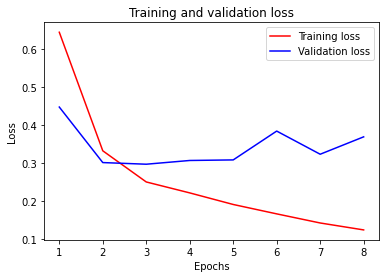

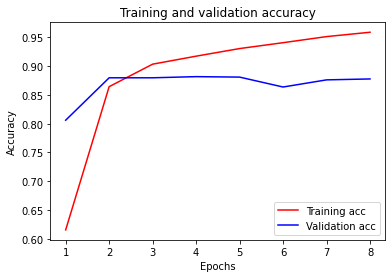

              precision    recall  f1-score   support

           0      0.851     0.906     0.877     12500
           1      0.900     0.841     0.869     12500

    accuracy                          0.873     25000
   macro avg      0.875     0.873     0.873     25000
weighted avg      0.875     0.873     0.873     25000


Average accuracy: 0.8787 (+/- 0.0033)
Average loss: 0.2901 (+/- 0.0062)
Average F1: 0.8773 (+/- 0.0052)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):
  
  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()
  
  inputs = Input(shape=(None,), dtype="int32")
  embeddings = Embedding(input_dim=input_dim, output_dim=output_dim)(inputs)
  bilstm = Bidirectional(LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True, return_sequences=True))(embeddings)
  attention_layer = Attention()([bilstm, bilstm])
  pooling_out1 = GlobalMaxPooling1D()(bilstm)
  pooling_out2 = GlobalMaxPooling1D()(attention_layer)
  merge = Concatenate()([pooling_out1, pooling_out2])
  mlp_hidden_out = Dense(units=64, activation="relu")(merge)
  mlp_hidden_out = Dropout(rate=0.5)(mlp_hidden_out)
  outputs = Dense(units=1, activation="sigmoid")(mlp_hidden_out)
  model = Model(inputs=inputs, outputs=outputs)

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
